In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
houses = pd.read_csv('dataset/housing.csv')
print(houses.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [3]:
houses = houses.dropna()

In [4]:
print(houses.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

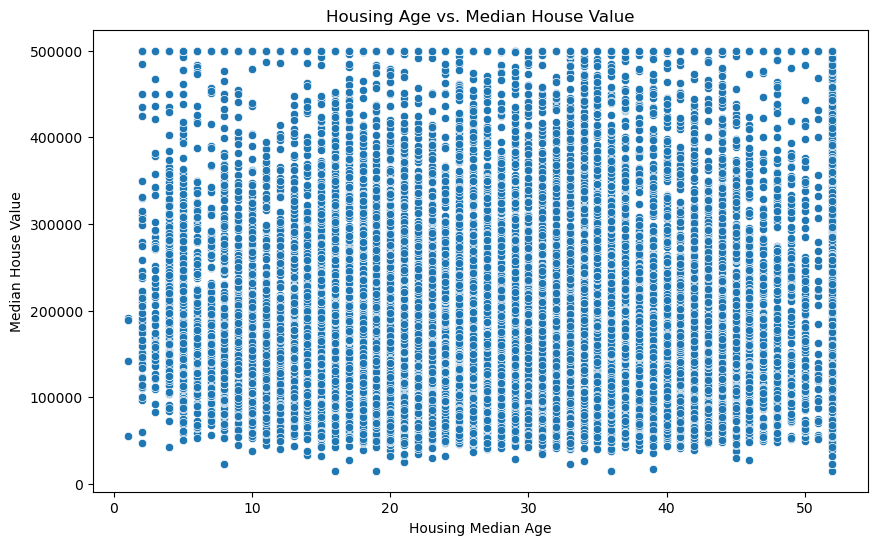

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='housing_median_age', y='median_house_value', data=houses)
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.title('Housing Age vs. Median House Value')
plt.show()

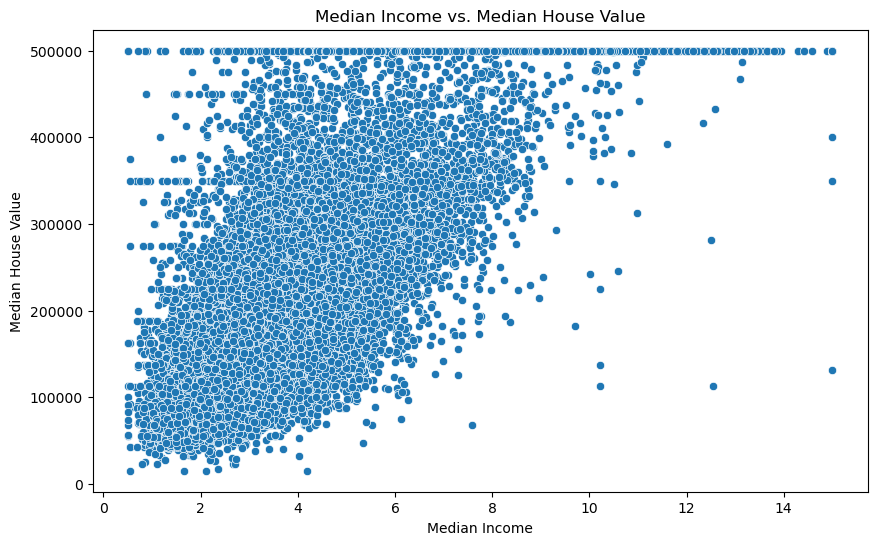

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='median_income', y='median_house_value', data=houses)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs. Median House Value')
plt.show()

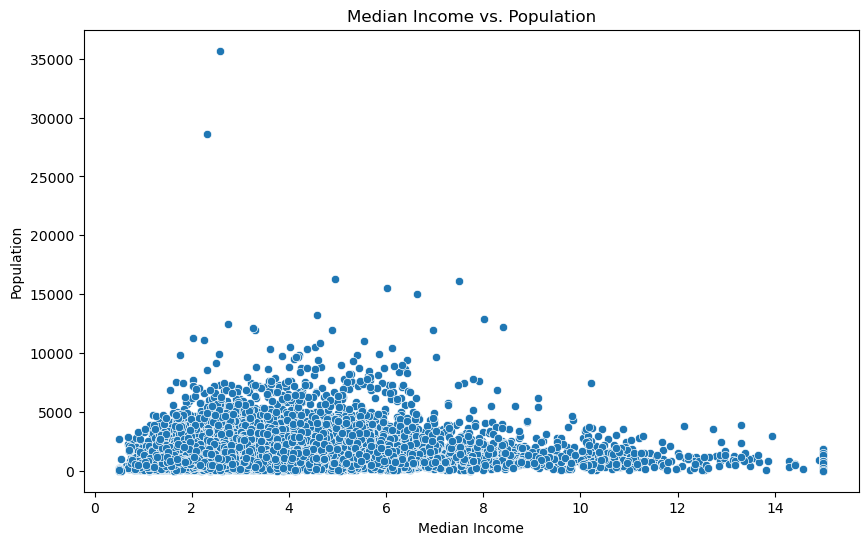

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='median_income', y='population', data=houses)
plt.ylabel('Population')
plt.xlabel('Median Income')
plt.title('Median Income vs. Population')
plt.show()

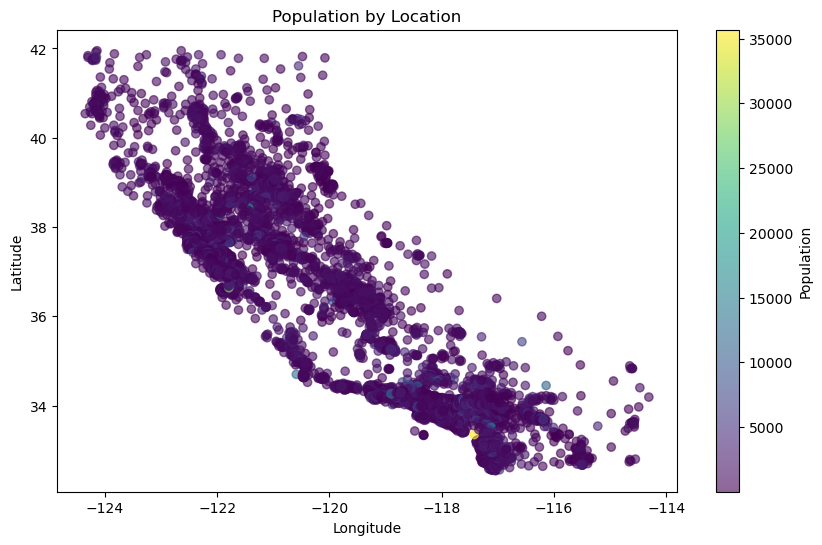

In [8]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(houses['longitude'], houses['latitude'], c=houses['population'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Population')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Population by Location')
plt.show()

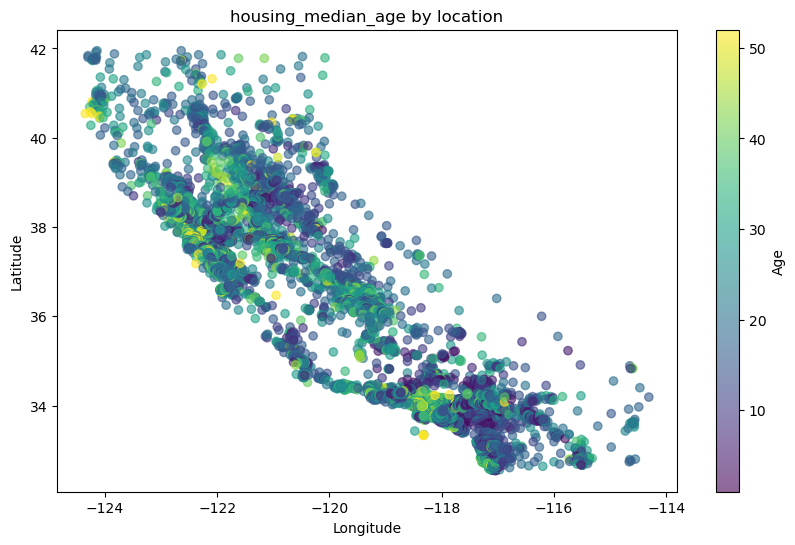

In [9]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(houses['longitude'], houses['latitude'], c=houses['housing_median_age'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Age')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('housing_median_age by location')
plt.show()

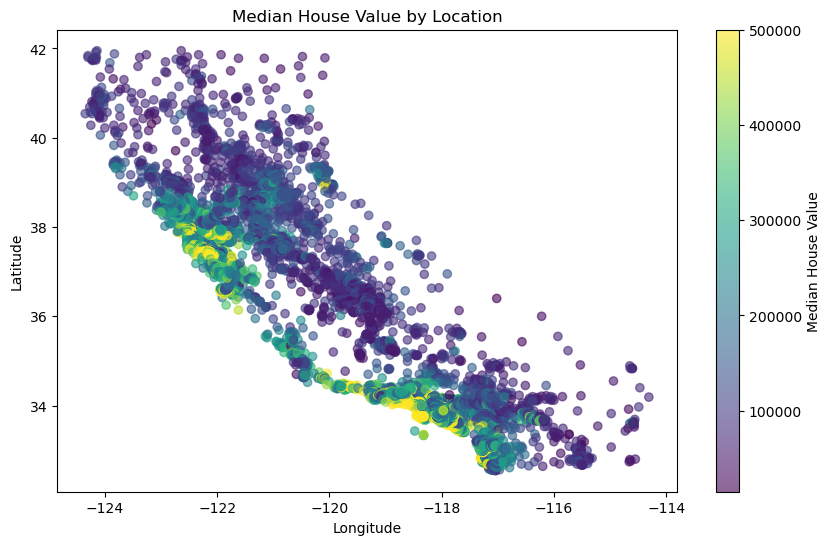

In [10]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(houses['longitude'], houses['latitude'], c=houses['median_house_value'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Median House Value by Location')
plt.show()

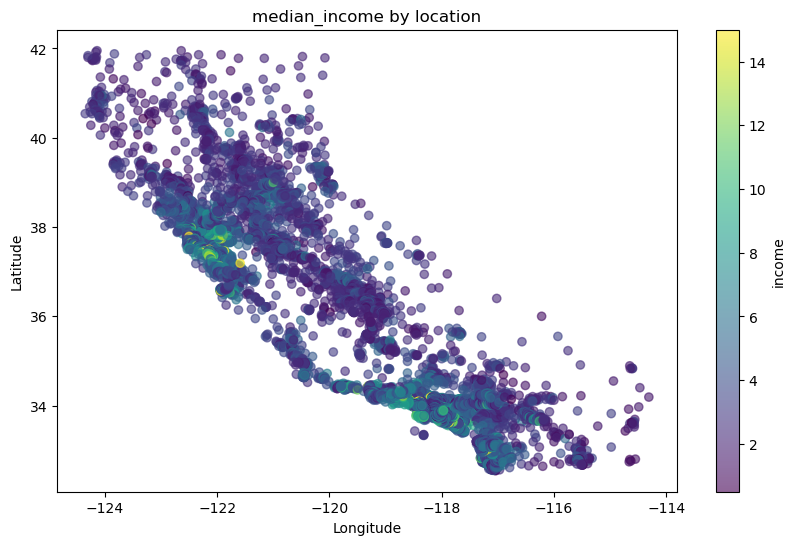

In [11]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(houses['longitude'], houses['latitude'], c=houses['median_income'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='income')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('median_income by location')
plt.show()

## Side by side
- income by location
- value by location
- housing age by location

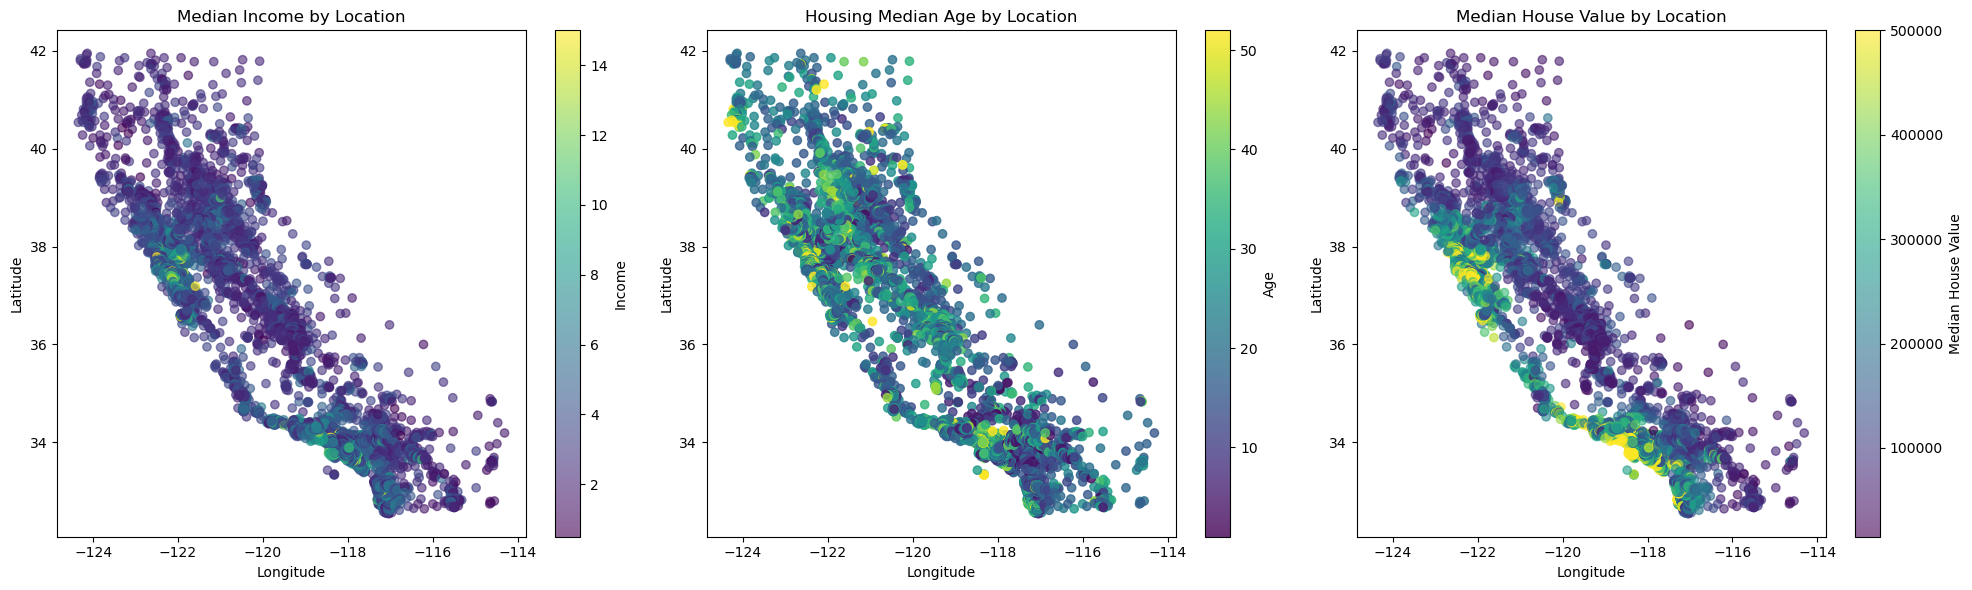

In [12]:
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Median Income by Location
scatter1 = axs[0].scatter(houses['longitude'], houses['latitude'], c=houses['median_income'], cmap='viridis', alpha=0.6)
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].set_title('Median Income by Location')
fig.colorbar(scatter1, ax=axs[0], label='Income')

# Plot 2: Housing Median Age by Location
scatter2 = axs[1].scatter(houses['longitude'], houses['latitude'], c=houses['housing_median_age'], cmap='viridis', alpha=0.8)
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].set_title('Housing Median Age by Location')
fig.colorbar(scatter2, ax=axs[1], label='Age')

# Plot 3: Median House Value by Location
scatter3 = axs[2].scatter(houses['longitude'], houses['latitude'], c=houses['median_house_value'], cmap='viridis', alpha=0.6)
axs[2].set_xlabel('Longitude')
axs[2].set_ylabel('Latitude')
axs[2].set_title('Median House Value by Location')
fig.colorbar(scatter3, ax=axs[2], label='Median House Value')

plt.tight_layout()
plt.show()

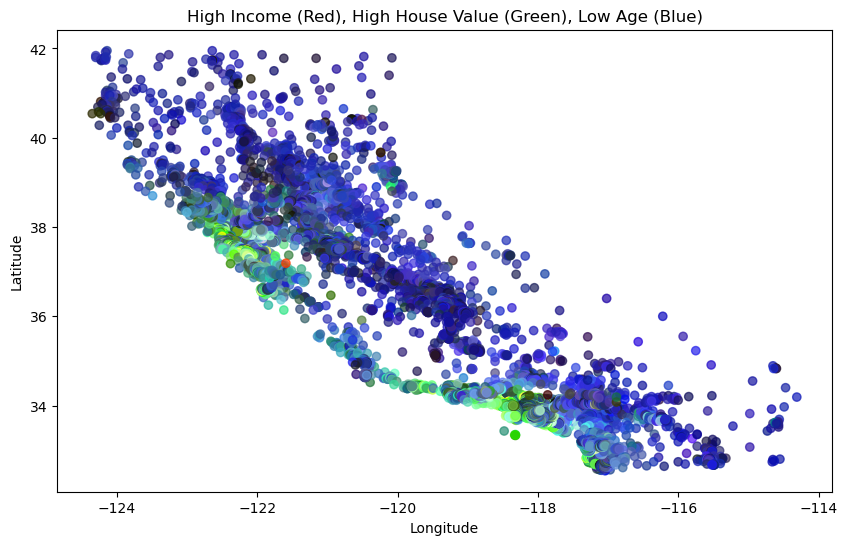

In [14]:
# Normalize the data to a [0, 1] range
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Normalize median_income and median_house_value for high values
norm_income = normalize(houses['median_income'])  # High income -> High red
norm_value = normalize(houses['median_house_value'])  # High value -> High green

# Inversely normalize housing_median_age for low values
norm_age = 1 - normalize(houses['housing_median_age'])  # Low age -> High blue

# Create an RGB color for each data point
colors = np.zeros((len(houses), 3))
colors[:, 0] = norm_income  # Red channel for median_income (high is red)
colors[:, 1] = norm_value   # Green channel for median_house_value (high is green)
colors[:, 2] = norm_age     # Blue channel for housing_median_age (low is blue)

# Create the scatter plot with combined RGB colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(houses['longitude'], houses['latitude'], c=colors, alpha=0.7)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('High Income (Red), High House Value (Green), Low Age (Blue)')
plt.show()